In [25]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
# Remove 0 values from x, y, z
data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

# Separate features (X) and target (y)
X = data.drop(columns=['price'], axis=1)  # Assuming 'price' is the target variable
y = data['price']

print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Identify categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])

# Combine encoded categorical data with the rest of X
X_non_categorical = X.drop(columns=categorical_columns)
X_encoded = pd.concat(
    [X_non_categorical.reset_index(drop=True),
     pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))],
    axis=1
)

# Standardize all features
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Display the standardized data
X_std.head()



Shape of X: (53920, 9)
Length of y: 53920


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,-0.316234,1.225692,-0.585917,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,-0.316234,-0.815866,1.706727,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,3.162213,-0.815866,-0.585917,-0.537354,...,-0.426481,-0.334328,-0.234389,-0.185303,-0.565442,-0.453123,2.366380,-0.542311,-0.269617,-0.32202
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,-0.316234,-0.815866,1.706727,-0.537354,...,-0.426481,2.991071,-0.234389,-0.185303,-0.565442,-0.453123,-0.422586,1.843962,-0.269617,-0.32202
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,3.162213,-0.815866,-0.585917,-0.537354,...,-0.426481,-0.334328,4.266413,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202


In [29]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert to NumPy arrays
X_std_np = X_std.values
y_np = y.values

# Verify shapes
print("Shape of X_std_np:", X_std_np.shape)
print("Shape of y_np:", y_np.shape)



Shape of X_std_np: (53920, 23)
Shape of y_np: (53920,)


In [30]:
bins = [0, 2000, 5000, data['price'].max()]  # Adjust these bin edges if needed
labels = ['Low', 'Medium', 'High']
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels)


In [31]:
from sklearn.model_selection import train_test_split

X = X_std  # standardized features
y = data['price_category']  # newly created price category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Find the most frequent class in the training set
most_frequent_class = y_train.mode()[0]


In [33]:
# Predict the most frequent class for all instances in the test set
y_pred_baseline = [most_frequent_class] * len(y_test)


In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate baseline accuracy and other metrics
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))


Baseline Model Accuracy: 0.44649480712166173
              precision    recall  f1-score   support

        High       0.00      0.00      0.00      2920
         Low       0.45      1.00      0.62      4815
      Medium       0.00      0.00      0.00      3049

    accuracy                           0.45     10784
   macro avg       0.15      0.33      0.21     10784
weighted avg       0.20      0.45      0.28     10784



/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
baseline_model = LogisticRegression(max_iter=100)
baseline_model.fit(X_train, y_train)


LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Predict and evaluate
y_pred = baseline_model.predict(X_test)
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Baseline Model Accuracy: 0.9542841246290801
              precision    recall  f1-score   support

        High       0.95      0.95      0.95      2920
         Low       0.98      0.98      0.98      4815
      Medium       0.92      0.91      0.92      3049

    accuracy                           0.95     10784
   macro avg       0.95      0.95      0.95     10784
weighted avg       0.95      0.95      0.95     10784



In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9534495548961425
              precision    recall  f1-score   support

        High       0.94      0.95      0.95      2920
         Low       0.98      0.98      0.98      4815
      Medium       0.92      0.91      0.92      3049

    accuracy                           0.95     10784
   macro avg       0.95      0.95      0.95     10784
weighted avg       0.95      0.95      0.95     10784



In [39]:
# Step 1: Define Price Ranges for Classification
bins = [0, 950, 5300, data['price'].max()]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for price ranges
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels)

# Encode price categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['price_category'])
print("Encoded price categories:", label_encoder.classes_)
print("Target distribution:\n", np.bincount(y))

# Step 2: Set Up Baseline Model for Classification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_std, y)
baseline_predictions = baseline_model.predict(X_std)
baseline_accuracy = accuracy_score(y, baseline_predictions)
print("Baseline Model Accuracy:", baseline_accuracy)

# Step 3: Implement Two-Level Cross-Validation for Logistic Regression and KNN
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Start with 5, can be tuned

outer_scores = {'Logistic': [], 'KNN': []}

for train_idx, test_idx in outer_cv.split(X_std, y):
    X_train, X_test = X_std.values[train_idx], X_std.values[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    logistic_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    
    logistic_pred = logistic_model.predict(X_test)
    knn_pred = knn_model.predict(X_test)
    
    outer_scores['Logistic'].append(accuracy_score(y_test, logistic_pred))
    outer_scores['KNN'].append(accuracy_score(y_test, knn_pred))

print("Logistic Regression Average Accuracy:", np.mean(outer_scores['Logistic']))
print("KNN Average Accuracy:", np.mean(outer_scores['KNN']))


Encoded price categories: ['High' 'Low' 'Medium']
Target distribution:
 [13552 13490 26878]
Baseline Model Accuracy: 0.4984792284866469
Logistic Regression Average Accuracy: 0.9401891691394659
KNN Average Accuracy: 0.915189169139466


In [40]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assume X (features) and y (target) are defined as in previous steps
X = X_std.values

# Set up baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Set up logistic regression with a range of regularization parameters
logistic_params = [0.001, 0.01, 0.1, 1, 10, 100]  # Range of C values to test
logistic_model = LogisticRegression(max_iter=1000)

# Choose k-Nearest Neighbors as method 2, with a range for k
knn_params = [1, 3, 5, 7, 9]  # Range of k values
knn_model = KNeighborsClassifier()

# Outer cross-validation for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

outer_scores = {'Baseline': [], 'Logistic': [], 'KNN': []}

for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Baseline model
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_test)
    outer_scores['Baseline'].append(accuracy_score(y_test, baseline_pred))
    
    # Logistic Regression: Inner CV for hyperparameter tuning
    best_logistic_score = 0
    best_logistic_model = None
    for C in logistic_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = LogisticRegression(C=C, max_iter=1000)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_logistic_score:
            best_logistic_score = avg_inner_score
            best_logistic_model = LogisticRegression(C=C, max_iter=1000)
    # Train best logistic model on outer train and evaluate on outer test
    best_logistic_model.fit(X_train, y_train)
    logistic_pred = best_logistic_model.predict(X_test)
    outer_scores['Logistic'].append(accuracy_score(y_test, logistic_pred))
    
    # k-Nearest Neighbors (kNN): Inner CV for hyperparameter tuning
    best_knn_score = 0
    best_knn_model = None
    for k in knn_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_knn_score:
            best_knn_score = avg_inner_score
            best_knn_model = KNeighborsClassifier(n_neighbors=k)
    # Train best kNN model on outer train and evaluate on outer test
    best_knn_model.fit(X_train, y_train)
    knn_pred = best_knn_model.predict(X_test)
    outer_scores['KNN'].append(accuracy_score(y_test, knn_pred))

# Display results
print("Baseline Average Accuracy:", np.mean(outer_scores['Baseline']))
print("Logistic Regression Average Accuracy:", np.mean(outer_scores['Logistic']))
print("KNN Average Accuracy:", np.mean(outer_scores['KNN']))


Baseline Average Accuracy: 0.4984792284866469
Logistic Regression Average Accuracy: 0.9422477744807122
KNN Average Accuracy: 0.9146142433234422


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assume X (features) and y (target) are defined as in previous steps
X = X_std.values

# Set up baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Set up logistic regression with a range of regularization parameters
logistic_params = [0.001, 0.01, 0.1, 1, 10, 100]  # Range of C values to test
logistic_model = LogisticRegression(max_iter=1000)

# Choose k-Nearest Neighbors as method 2, with a range for k
knn_params = [1, 3, 5, 7, 9]  # Range of k values
knn_model = KNeighborsClassifier()

# Outer cross-validation for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize table for results
results_table = {
    "Outer Fold": [],
    "Method 2 (k*)": [],
    "Method 2 E_test": [],
    "Logistic (λ*)": [],
    "Logistic E_test": [],
    "Baseline E_test": []
}

fold_number = 1

for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Baseline model
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_test)
    baseline_error = 1 - accuracy_score(y_test, baseline_pred)
    
    # Logistic Regression: Inner CV for hyperparameter tuning
    best_logistic_score = 0
    best_logistic_model = None
    best_C = None
    for C in logistic_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = LogisticRegression(C=C, max_iter=1000)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_logistic_score:
            best_logistic_score = avg_inner_score
            best_logistic_model = LogisticRegression(C=C, max_iter=1000)
            best_C = C
    # Train best logistic model on outer train and evaluate on outer test
    best_logistic_model.fit(X_train, y_train)
    logistic_pred = best_logistic_model.predict(X_test)
    logistic_error = 1 - accuracy_score(y_test, logistic_pred)
    
    # k-Nearest Neighbors (kNN): Inner CV for hyperparameter tuning
    best_knn_score = 0
    best_knn_model = None
    best_k = None
    for k in knn_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_knn_score:
            best_knn_score = avg_inner_score
            best_knn_model = KNeighborsClassifier(n_neighbors=k)
            best_k = k
    # Train best kNN model on outer train and evaluate on outer test
    best_knn_model.fit(X_train, y_train)
    knn_pred = best_knn_model.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, knn_pred)

    # Append results for this fold
    results_table["Outer Fold"].append(fold_number)
    results_table["Method 2 (k*)"].append(best_k)
    results_table["Method 2 E_test"].append(knn_error)
    results_table["Logistic (λ*)"].append(best_C)
    results_table["Logistic E_test"].append(logistic_error)
    results_table["Baseline E_test"].append(baseline_error)

    fold_number += 1

# Display results as a DataFrame similar to Table 2
results_df = pd.DataFrame(results_table)
print(results_df)


   Outer Fold  Method 2 (k*)  Method 2 E_test  Logistic (λ*)  Logistic E_test  \
0           1              5         0.084662            100         0.054896   
1           2              5         0.086424            100         0.058976   
2           3              5         0.084106            100         0.059069   
3           4              5         0.087630            100         0.061665   
4           5              7         0.084106            100         0.054154   

   Baseline E_test  
0         0.501484  
1         0.501484  
2         0.501484  
3         0.501576  
4         0.501576  


In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assume X (features) and y (target) are defined as in previous steps
X = X_std.values

# Set up baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Set up logistic regression with a range of regularization parameters
logistic_params = [0.001, 0.01, 0.1, 1, 10, 100]  # Range of C values to test
logistic_model = LogisticRegression(max_iter=1000)

# Choose k-Nearest Neighbors as method 2, with a range for k
knn_params = [1, 3, 5, 7, 9]  # Range of k values
knn_model = KNeighborsClassifier()

# Outer cross-validation for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize table for results
results_table = {
    "Outer Fold": [],
    "Method 2 (k*)": [],
    "Method 2 E_test": [],
    "Logistic (λ*)": [],
    "Logistic E_test": [],
    "Baseline E_test": []
}

# Initialize lists to collect true labels and predictions
all_true_labels = []
all_baseline_preds = []
all_logistic_preds = []
all_knn_preds = []

fold_number = 1

for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Baseline model
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_test)
    baseline_error = 1 - accuracy_score(y_test, baseline_pred)
    
    # Logistic Regression: Inner CV for hyperparameter tuning
    best_logistic_score = 0
    best_logistic_model = None
    best_C = None
    for C in logistic_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = LogisticRegression(C=C, max_iter=1000)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_logistic_score:
            best_logistic_score = avg_inner_score
            best_logistic_model = LogisticRegression(C=C, max_iter=1000)
            best_C = C
    # Train best logistic model on outer train and evaluate on outer test
    best_logistic_model.fit(X_train, y_train)
    logistic_pred = best_logistic_model.predict(X_test)
    logistic_error = 1 - accuracy_score(y_test, logistic_pred)
    
    # k-Nearest Neighbors (kNN): Inner CV for hyperparameter tuning
    best_knn_score = 0
    best_knn_model = None
    best_k = None
    for k in knn_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            X_inner_train, X_inner_test = X[inner_train_idx], X[inner_test_idx]
            y_inner_train, y_inner_test = y[inner_train_idx], y[inner_test_idx]
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_inner_train, y_inner_train)
            inner_scores.append(accuracy_score(y_inner_test, model.predict(X_inner_test)))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_knn_score:
            best_knn_score = avg_inner_score
            best_knn_model = KNeighborsClassifier(n_neighbors=k)
            best_k = k
    # Train best kNN model on outer train and evaluate on outer test
    best_knn_model.fit(X_train, y_train)
    knn_pred = best_knn_model.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, knn_pred)

    # Collect true labels and predictions
    all_true_labels.extend(y_test)
    all_baseline_preds.extend(baseline_pred)
    all_logistic_preds.extend(logistic_pred)
    all_knn_preds.extend(knn_pred)
    
    # Append results for this fold
    results_table["Outer Fold"].append(fold_number)
    results_table["Method 2 (k*)"].append(best_k)
    results_table["Method 2 E_test"].append(knn_error)
    results_table["Logistic (λ*)"].append(best_C)
    results_table["Logistic E_test"].append(logistic_error)
    results_table["Baseline E_test"].append(baseline_error)

    fold_number += 1

# Display results as a DataFrame similar to Table 2
results_df = pd.DataFrame(results_table)
print(results_df)


   Outer Fold  Method 2 (k*)  Method 2 E_test  Logistic (λ*)  Logistic E_test  \
0           1              5         0.084662            100         0.054896   
1           2              5         0.086424            100         0.058976   
2           3              5         0.084106            100         0.059069   
3           4              5         0.087630            100         0.061665   
4           5              7         0.084106            100         0.054154   

   Baseline E_test  
0         0.501484  
1         0.501484  
2         0.501484  
3         0.501576  
4         0.501576  


In [53]:
from statsmodels.stats.contingency_tables import mcnemar

# Convert lists to numpy arrays for easier indexing
all_true_labels = np.array(all_true_labels)
all_baseline_preds = np.array(all_baseline_preds)
all_logistic_preds = np.array(all_logistic_preds)
all_knn_preds = np.array(all_knn_preds)


In [54]:
def perform_mcnemar_test(y_true, model1_pred, model2_pred, model1_name, model2_name):
    # Create contingency table
    both_correct = np.sum((model1_pred == y_true) & (model2_pred == y_true))
    model1_correct_model2_incorrect = np.sum((model1_pred == y_true) & (model2_pred != y_true))
    model1_incorrect_model2_correct = np.sum((model1_pred != y_true) & (model2_pred == y_true))
    both_incorrect = np.sum((model1_pred != y_true) & (model2_pred != y_true))
    
    table = [[both_correct, model1_correct_model2_incorrect],
             [model1_incorrect_model2_correct, both_incorrect]]
    
    print(f"\nContingency Table for {model1_name} vs {model2_name}:\n{pd.DataFrame(table, index=['Model1 Correct', 'Model1 Incorrect'], columns=['Model2 Correct', 'Model2 Incorrect'])}")
    
    # Perform McNemar's test
    result = mcnemar(table, exact=False, correction=True)
    print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue}")
    
    # Compute confidence interval for the difference in proportions
    b = model1_correct_model2_incorrect
    c = model1_incorrect_model2_correct
    n = b + c
    diff = (b - c) / n if n != 0 else 0
    se = np.sqrt((b + c - (b - c)**2 / n) / n) if n != 0 else 0
    z = 1.96  # For 95% confidence interval
    lower = diff - z * se
    upper = diff + z * se
    print(f"95% confidence interval for the difference in proportions: ({lower:.4f}, {upper:.4f})")
    
    return result.pvalue, (lower, upper)


In [55]:
# Logistic Regression vs Baseline
pvalue_logistic_baseline, ci_logistic_baseline = perform_mcnemar_test(
    all_true_labels, all_logistic_preds, all_baseline_preds, 'Logistic Regression', 'Baseline'
)

# kNN vs Baseline
pvalue_knn_baseline, ci_knn_baseline = perform_mcnemar_test(
    all_true_labels, all_knn_preds, all_baseline_preds, 'kNN', 'Baseline'
)

# Logistic Regression vs kNN
pvalue_logistic_knn, ci_logistic_knn = perform_mcnemar_test(
    all_true_labels, all_logistic_preds, all_knn_preds, 'Logistic Regression', 'kNN'
)



Contingency Table for Logistic Regression vs Baseline:
                  Model2 Correct  Model2 Incorrect
Model1 Correct             25242             25564
Model1 Incorrect            1636              1478
McNemar's test statistic: 21047.842977941178, p-value: 0.0
95% confidence interval for the difference in proportions: (-0.0523, 1.8117)

Contingency Table for kNN vs Baseline:
                  Model2 Correct  Model2 Incorrect
Model1 Correct             24572             24744
Model1 Incorrect            2306              2298
McNemar's test statistic: 18610.682772643253, p-value: 0.0
95% confidence interval for the difference in proportions: (-0.2652, 1.9242)

Contingency Table for Logistic Regression vs kNN:
                  Model2 Correct  Model2 Incorrect
Model1 Correct             48137              2669
Model1 Incorrect            1179              1935
McNemar's test statistic: 576.174896049896, p-value: 2.547554014106519e-127
95% confidence interval for the difference in 

In [56]:
import pandas as pd

# Calculate mean accuracy/error across folds for each model
results_df["Baseline Accuracy"] = 1 - results_df["Baseline E_test"]
results_df["Logistic Accuracy"] = 1 - results_df["Logistic E_test"]
results_df["kNN Accuracy"] = 1 - results_df["Method 2 E_test"]

mean_baseline_accuracy = results_df["Baseline Accuracy"].mean()
mean_logistic_accuracy = results_df["Logistic Accuracy"].mean()
mean_knn_accuracy = results_df["kNN Accuracy"].mean()

print("Mean Accuracies:")
print(f"Baseline: {mean_baseline_accuracy:.3f}")
print(f"Logistic Regression: {mean_logistic_accuracy:.3f}")
print(f"k-Nearest Neighbors: {mean_knn_accuracy:.3f}")


Mean Accuracies:
Baseline: 0.498
Logistic Regression: 0.942
k-Nearest Neighbors: 0.915


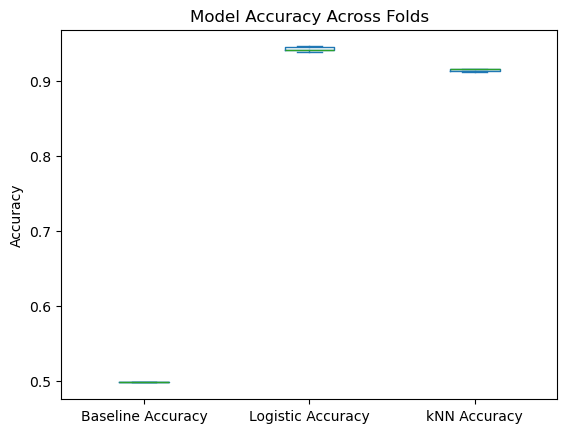

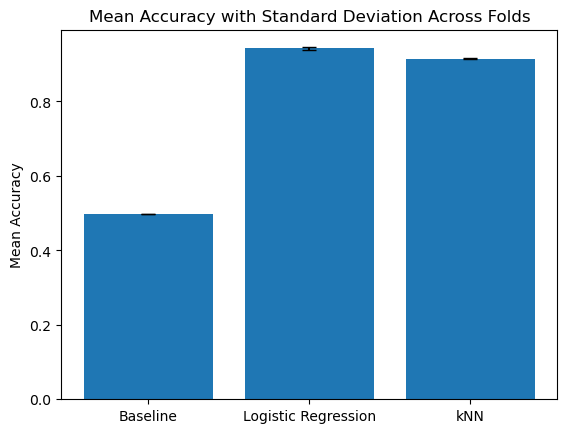

In [57]:
import matplotlib.pyplot as plt

# Boxplot for accuracy comparison
results_df[["Baseline Accuracy", "Logistic Accuracy", "kNN Accuracy"]].plot(kind="box", title="Model Accuracy Across Folds")
plt.ylabel("Accuracy")
plt.show()

# Alternatively, a bar plot with error bars for each model's mean accuracy
means = [mean_baseline_accuracy, mean_logistic_accuracy, mean_knn_accuracy]
stds = [results_df["Baseline Accuracy"].std(), results_df["Logistic Accuracy"].std(), results_df["kNN Accuracy"].std()]

plt.bar(["Baseline", "Logistic Regression", "kNN"], means, yerr=stds, capsize=5)
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy with Standard Deviation Across Folds")
plt.show()


In [58]:
import numpy as np

# Sample a subset of the true labels and predictions
np.random.seed(42)
sample_indices = np.random.choice(len(all_true_labels), size=500, replace=False)  # Adjust size as needed

# Subsample true labels and model predictions
sample_true_labels = all_true_labels[sample_indices]
sample_baseline_preds = all_baseline_preds[sample_indices]
sample_logistic_preds = all_logistic_preds[sample_indices]
sample_knn_preds = all_knn_preds[sample_indices]

# Re-run McNemar's test on the subsample
# Logistic Regression vs Baseline
perform_mcnemar_test(sample_true_labels, sample_logistic_preds, sample_baseline_preds, 'Logistic Regression', 'Baseline')

# kNN vs Baseline
perform_mcnemar_test(sample_true_labels, sample_knn_preds, sample_baseline_preds, 'kNN', 'Baseline')

# Logistic Regression vs kNN
perform_mcnemar_test(sample_true_labels, sample_logistic_preds, sample_knn_preds, 'Logistic Regression', 'kNN')



Contingency Table for Logistic Regression vs Baseline:
                  Model2 Correct  Model2 Incorrect
Model1 Correct               226               253
Model1 Incorrect              14                 7
McNemar's test statistic: 212.1498127340824, p-value: 4.664968331405157e-48
95% confidence interval for the difference in proportions: (0.0214, 1.7689)

Contingency Table for kNN vs Baseline:
                  Model2 Correct  Model2 Incorrect
Model1 Correct               228               247
Model1 Incorrect              12                13
McNemar's test statistic: 211.41312741312743, p-value: 6.754081007548819e-48
95% confidence interval for the difference in proportions: (0.0833, 1.7313)

Contingency Table for Logistic Regression vs kNN:
                  Model2 Correct  Model2 Incorrect
Model1 Correct               463                16
Model1 Incorrect              12                 9
McNemar's test statistic: 0.32142857142857145, p-value: 0.5707503880581739
95% confidence

(0.5707503880581739, (-1.7970397616199998, 2.0827540473342854))